In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
submission=pd.read_csv('submission.csv')

In [60]:
train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      5429 non-null   object 
 1   session_number  5429 non-null   int64  
 2   client_agent    5269 non-null   object 
 3   device_details  5429 non-null   object 
 4   date            5429 non-null   object 
 5   purchased       5429 non-null   int64  
 6   added_in_cart   5429 non-null   int64  
 7   checked_out     5429 non-null   int64  
 8   time_spent      5429 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 381.9+ KB


In [61]:
mergedf=train.append(test) # appends the dataset row wise as the default value for axis=0
mergedf=mergedf.reset_index(drop=True) # resets the index and drops the old index with drop=True
mergedf = mergedf.fillna('0') #fills missing values of time_spent on test data with  zeros
mergedf.shape

(7756, 9)

In [62]:
mergedf.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.45
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.88


In [63]:
mergedf['device_details'].value_counts()

iPhone - iOS                  2130
Desktop - Chrome              1181
iPhone - Web                   944
Android Phone - Android        451
Desktop - Safari               443
iPhone - MobileWeb             429
Desktop - IE                   429
iPad - Web                     413
Desktop - Firefox              327
Android Tablet - Web           299
Other - Other                  267
Unknown - MobileWeb            122
iPad - iOS                     121
Android Phone - Web            112
Android Phone - MobileWeb       72
Android Tablet - Android        14
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

In [64]:
def device_used(df):
    mergedf['device_used']=np.nan
    for i in range(len(mergedf)):
        check = mergedf.loc[i,'device_details']
        if('Tablet' in check):
            mergedf.loc[i,'device_used'] = 'Tablet'
        elif('Phone' in check):
            mergedf.loc[i,'device_used'] = 'SmartPhone'
        elif('Desktop' in check):
            mergedf.loc[i,'device_used'] = 'Desktop'
        elif('Unknown' in check):
            mergedf.loc[i,'device_used'] = 'SmartPhone'
        elif('iPad' in check):
            mergedf.loc[i,'device_used'] = 'Tablet'
        elif('iPhone' in check):
            mergedf.loc[i,'device_used'] = 'SmartPhone'
        elif('Other' in check):
            mergedf.loc[i,'device_used'] = 'Others'
    return df

def medium_used(df):
    mergedf['medium_used'] = np.nan
    for i in range(len(mergedf)):
        check = mergedf.loc[i,'device_details']
        if('Desktop - Chrome' == check):
            mergedf.loc[i,'medium_used'] = 'Chrome'
        elif('iPhone - iOS' == check):
            mergedf.loc[i,'medium_used'] = 'Application'
        elif('iPhone - MobileWeb' == check):
            mergedf.loc[i,'medium_used'] = 'MobileWeb'
        elif('Desktop - IE' == check):
            mergedf.loc[i,'medium_used'] = 'IE'
        elif('iPhone - Web' == check):
            mergedf.loc[i,'medium_used'] = 'Safari'
        elif('Android Phone - Android' == check):
            mergedf.loc[i,'medium_used'] = 'Application'
        elif('Desktop - Firefox' == check):
            mergedf.loc[i,'medium_used'] = 'Firefox'
        elif('Android Tablet - Web' == check):
            mergedf.loc[i,'medium_used'] = 'MobileWeb'
        elif('iPad - Web' == check):
            mergedf.loc[i,'medium_used'] = 'MobileWeb'
        elif('Other - Other' == check):
            mergedf.loc[i,'medium_used'] = 'Others'
        elif('Desktop - Safari' == check):
            mergedf.loc[i,'medium_used'] = 'Safari'
        elif('Android Phone - Web' == check):
            mergedf.loc[i,'medium_used'] = 'MobileWeb'
        elif('iPad - iOS' == check):
            mergedf.loc[i,'medium_used'] = 'Application'
        elif('Android Phone - MobileWeb' == check):
            mergedf.loc[i,'medium_used'] = 'MobileWeb'
        elif('Unknown - MobileWeb' == check):
            mergedf.loc[i,'medium_used'] = 'MobileWeb'
        elif('Android Tablet - Android' == check):
            mergedf.loc[i,'medium_used'] = 'Application'
        elif('Android Tablet - MobileWeb' == check):
            mergedf.loc[i,'medium_used'] = 'MobileWeb'
    return df

def os_used(df):
    mergedf['os_used']=np.nan
    for i in range(len(mergedf)):
        check =mergedf.loc[i,'device_details']
        if('Desktop - Chrome' == check):
            mergedf.loc[i,'os_used'] = 'Windows'
        elif('iPhone - iOS' == check):
            mergedf.loc[i,'os_used'] = 'ios'
        elif('iPhone - MobileWeb' == check):
            mergedf.loc[i,'os_used'] = 'ios'
        elif('Desktop - IE' == check):
            mergedf.loc[i,'os_used'] = 'Windows'
        elif('iPhone - Web' == check):
            mergedf.loc[i,'os_used'] = 'ios'
        elif('Android Phone - Android' == check):
            mergedf.loc[i,'os_used'] = 'Android'
        elif('Desktop - Firefox' == check):
            mergedf.loc[i,'os_used'] = 'Windows'
        elif('Android Tablet - Web' == check):
            mergedf.loc[i,'os_used'] = 'Android'
        elif('iPad - Web' == check):
            mergedf.loc[i,'os_used'] = 'ios'
        elif('Other - Other' == check):
            mergedf.loc[i,'os_used'] = 'Others'
        elif('Desktop - Safari' == check):
            mergedf.loc[i,'os_used'] = 'MacOS'
        elif('Android Phone - Web' == check):
            mergedf.loc[i,'os_used'] = 'Android'
        elif('iPad - iOS' == check):
            mergedf.loc[i,'os_used'] = 'ios'
        elif('Android Phone - MobileWeb' == check):
            mergedf.loc[i,'os_used'] = 'Android'
        elif('Unknown - MobileWeb' == check):
            mergedf.loc[i,'os_used'] = 'Unknown'
        elif('Android Tablet - Android' == check):
            mergedf.loc[i,'os_used'] = 'Android'
        elif('Android Tablet - MobileWeb' == check):
            mergedf.loc[i,'os_used'] = 'Android'
    return df         
    

In [65]:
mergedf = medium_used(mergedf)
mergedf = device_used(mergedf)
mergedf = os_used(mergedf)

In [66]:
mergedf.device_used.value_counts()

SmartPhone    4260
Desktop       2380
Tablet         849
Others         267
Name: device_used, dtype: int64

In [67]:
mergedf.os_used.value_counts()

ios        4037
Windows    1937
Android     950
MacOS       443
Others      267
Unknown     122
Name: os_used, dtype: int64

In [68]:
mergedf.medium_used.value_counts()

Application    2716
MobileWeb      1449
Safari         1387
Chrome         1181
IE              429
Firefox         327
Others          267
Name: medium_used, dtype: int64

In [69]:
mergedf=mergedf.drop(['session_id','client_agent','device_details'],axis=1)

In [70]:
mergedf.head()

,session_number,date,purchased,added_in_cart,checked_out,time_spent,medium_used,device_used,os_used
0,715,2020-01-22,1,0,0,236.886,Chrome,Desktop,Windows
1,55,2020-02-27,1,0,0,1277.45,Application,SmartPhone,ios
2,11,2019-08-01,0,0,0,21.704,MobileWeb,SmartPhone,ios
3,2794,2019-12-30,0,1,0,455.201,IE,Desktop,Windows
4,3674,2019-09-10,0,0,0,1164.88,Safari,SmartPhone,ios


In [71]:
mergedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   session_number  7756 non-null   int64 
 1   date            7756 non-null   object
 2   purchased       7756 non-null   int64 
 3   added_in_cart   7756 non-null   int64 
 4   checked_out     7756 non-null   int64 
 5   time_spent      7756 non-null   object
 6   medium_used     7756 non-null   object
 7   device_used     7756 non-null   object
 8   os_used         7756 non-null   object
dtypes: int64(4), object(5)
memory usage: 545.5+ KB


In [73]:
def Datefix(df):
    df['date']= pd.to_datetime(df['date']) 
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['year'] = df['date'].dt.year
    df['quarter'] = df['date'].dt.quarter
    df['weekname'] = df['date'].dt.day_name()
    df['is_weekend'] = np.where(df['weekname'].isin(['Sunday','Saturday']),1,0)
    return df

In [74]:
mergedf = Datefix(mergedf)

In [75]:
mergedf.month.value_counts()

9     1186
12    1100
11     806
1      800
10     789
2      744
8      722
7      587
3      422
6      337
5      148
4      115
Name: month, dtype: int64

In [76]:
mergedf.day.value_counts()

6     313
8     311
2     304
9     289
22    288
28    284
5     283
23    282
11    278
15    274
1     270
7     261
24    255
10    251
27    247
29    246
3     244
13    242
30    241
4     239
26    238
19    238
14    236
17    235
16    230
12    222
20    221
25    210
21    193
18    193
31    138
Name: day, dtype: int64

In [77]:
mergedf.year.value_counts()

2019    5675
2020    2081
Name: year, dtype: int64

In [78]:
mergedf.quarter.value_counts()

4    2695
3    2495
1    1966
2     600
Name: quarter, dtype: int64

In [79]:
mergedf.weekname.value_counts()

Sunday       1284
Monday       1232
Tuesday      1209
Wednesday    1132
Thursday     1014
Friday        962
Saturday      923
Name: weekname, dtype: int64

In [80]:
mergedf.year.value_counts()

2019    5675
2020    2081
Name: year, dtype: int64

In [81]:
mergedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   session_number  7756 non-null   int64         
 1   date            7756 non-null   datetime64[ns]
 2   purchased       7756 non-null   int64         
 3   added_in_cart   7756 non-null   int64         
 4   checked_out     7756 non-null   int64         
 5   time_spent      7756 non-null   object        
 6   medium_used     7756 non-null   object        
 7   device_used     7756 non-null   object        
 8   os_used         7756 non-null   object        
 9   month           7756 non-null   int64         
 10  day             7756 non-null   int64         
 11  year            7756 non-null   int64         
 12  quarter         7756 non-null   int64         
 13  weekname        7756 non-null   object        
 14  is_weekend      7756 non-null   int32         
dtypes: d

In [82]:
mergedf.head()

,session_number,date,purchased,added_in_cart,checked_out,time_spent,medium_used,device_used,os_used,month,day,year,quarter,weekname,is_weekend
0,715,2020-01-22,1,0,0,236.886,Chrome,Desktop,Windows,1,22,2020,1,Wednesday,0
1,55,2020-02-27,1,0,0,1277.45,Application,SmartPhone,ios,2,27,2020,1,Thursday,0
2,11,2019-08-01,0,0,0,21.704,MobileWeb,SmartPhone,ios,8,1,2019,3,Thursday,0
3,2794,2019-12-30,0,1,0,455.201,IE,Desktop,Windows,12,30,2019,4,Monday,0
4,3674,2019-09-10,0,0,0,1164.88,Safari,SmartPhone,ios,9,10,2019,3,Tuesday,0


In [83]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()  
mergedf['device_used'] = label_encoder.fit_transform(mergedf['device_used'])
mergedf['medium_used'] = label_encoder.fit_transform(mergedf['medium_used'])  
mergedf['os_used'] = label_encoder.fit_transform(mergedf['os_used'])
mergedf['weekname'] = label_encoder.fit_transform(mergedf['weekname'])
mergedf['year'] = label_encoder.fit_transform(mergedf['year'])

In [84]:
train_data = mergedf[:5429]
test_data = mergedf[5429:]
test_data = test_data.reset_index(drop=True)
test_data = test_data.drop(['time_spent','date'],axis = 1)

In [85]:
train_data['time_spent'] = train_data['time_spent'].astype(np.float64)

<ipython-input-85-d812b707e09f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['time_spent'] = train_data['time_spent'].astype(np.float64)


In [86]:
train_data.corr()

,session_number,purchased,added_in_cart,checked_out,time_spent,medium_used,device_used,os_used,month,day,year,quarter,weekname,is_weekend
session_number,1.000000,-0.213733,0.003013,-0.054500,0.078437,0.037864,0.206771,0.173426,0.076441,-0.002180,0.010174,0.035236,-0.004978,-0.006856
purchased,-0.213733,1.000000,0.045022,0.168513,0.200762,-0.077132,-0.204488,-0.052645,-0.052517,-0.011841,0.058483,-0.042185,0.005174,0.003793
added_in_cart,0.003013,0.045022,1.000000,0.215754,0.209807,-0.115092,-0.104202,-0.077701,-0.032181,0.018657,0.032900,-0.032628,0.020016,-0.041200
checked_out,-0.054500,0.168513,0.215754,1.000000,0.157765,-0.025088,-0.097741,-0.007433,-0.010186,-0.003823,0.008054,-0.011371,0.023959,0.003444
time_spent,0.078437,0.200762,0.209807,0.157765,1.000000,-0.059106,-0.027572,0.006396,0.013367,-0.030206,-0.030843,0.001644,-0.016746,-0.003068
medium_used,0.037864,-0.077132,-0.115092,-0.025088,-0.059106,1.000000,-0.005952,-0.179644,0.068453,0.006510,-0.086983,0.061276,-0.024090,0.027875
device_used,0.206771,-0.204488,-0.104202,-0.097741,-0.027572,-0.005952,1.000000,0.106887,0.041215,-0.009485,-0.038686,0.024788,-0.043043,0.003435
os_used,0.173426,-0.052645,-0.077701,-0.007433,0.006396,-0.179644,0.106887,1.000000,0.083042,0.011012,-0.042364,0.082660,-0.029207,0.017785
month,0.076441,-0.052517,-0.032181,-0.010186,0.013367,0.068453,0.041215,0.083042,1.000000,0.050067,-0.884790,0.975688,-0.035060,0.016119
day,-0.002180,-0.011841,0.018657,-0.003823,-0.030206,0.006510,-0.009485,0.011012,0.050067,1.000000,-0.087050,0.069822,-0.020627,-0.025156


<AxesSubplot:>

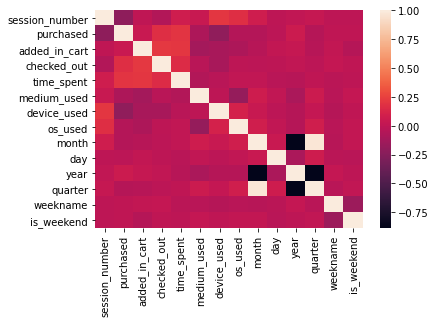

In [89]:
sns.heatmap(train_data.corr())

<AxesSubplot:>

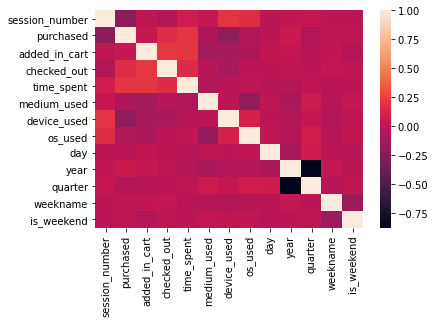

In [95]:
sns.heatmap(train_data.drop('month',axis=1).corr())

In [94]:
train_data.drop('month',axis=1).corr()

,session_number,purchased,added_in_cart,checked_out,time_spent,medium_used,device_used,os_used,day,year,quarter,weekname,is_weekend
session_number,1.000000,-0.213733,0.003013,-0.054500,0.078437,0.037864,0.206771,0.173426,-0.002180,0.010174,0.035236,-0.004978,-0.006856
purchased,-0.213733,1.000000,0.045022,0.168513,0.200762,-0.077132,-0.204488,-0.052645,-0.011841,0.058483,-0.042185,0.005174,0.003793
added_in_cart,0.003013,0.045022,1.000000,0.215754,0.209807,-0.115092,-0.104202,-0.077701,0.018657,0.032900,-0.032628,0.020016,-0.041200
checked_out,-0.054500,0.168513,0.215754,1.000000,0.157765,-0.025088,-0.097741,-0.007433,-0.003823,0.008054,-0.011371,0.023959,0.003444
time_spent,0.078437,0.200762,0.209807,0.157765,1.000000,-0.059106,-0.027572,0.006396,-0.030206,-0.030843,0.001644,-0.016746,-0.003068
medium_used,0.037864,-0.077132,-0.115092,-0.025088,-0.059106,1.000000,-0.005952,-0.179644,0.006510,-0.086983,0.061276,-0.024090,0.027875
device_used,0.206771,-0.204488,-0.104202,-0.097741,-0.027572,-0.005952,1.000000,0.106887,-0.009485,-0.038686,0.024788,-0.043043,0.003435
os_used,0.173426,-0.052645,-0.077701,-0.007433,0.006396,-0.179644,0.106887,1.000000,0.011012,-0.042364,0.082660,-0.029207,0.017785
day,-0.002180,-0.011841,0.018657,-0.003823,-0.030206,0.006510,-0.009485,0.011012,1.000000,-0.087050,0.069822,-0.020627,-0.025156
year,0.010174,0.058483,0.032900,0.008054,-0.030843,-0.086983,-0.038686,-0.042364,-0.087050,1.000000,-0.880020,0.024067,-0.005468


array([[<AxesSubplot:title={'center':'session_number'}>,
        <AxesSubplot:title={'center':'purchased'}>,
        <AxesSubplot:title={'center':'added_in_cart'}>,
        <AxesSubplot:title={'center':'checked_out'}>],
       [<AxesSubplot:title={'center':'time_spent'}>,
        <AxesSubplot:title={'center':'medium_used'}>,
        <AxesSubplot:title={'center':'device_used'}>,
        <AxesSubplot:title={'center':'os_used'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'quarter'}>],
       [<AxesSubplot:title={'center':'weekname'}>,
        <AxesSubplot:title={'center':'is_weekend'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

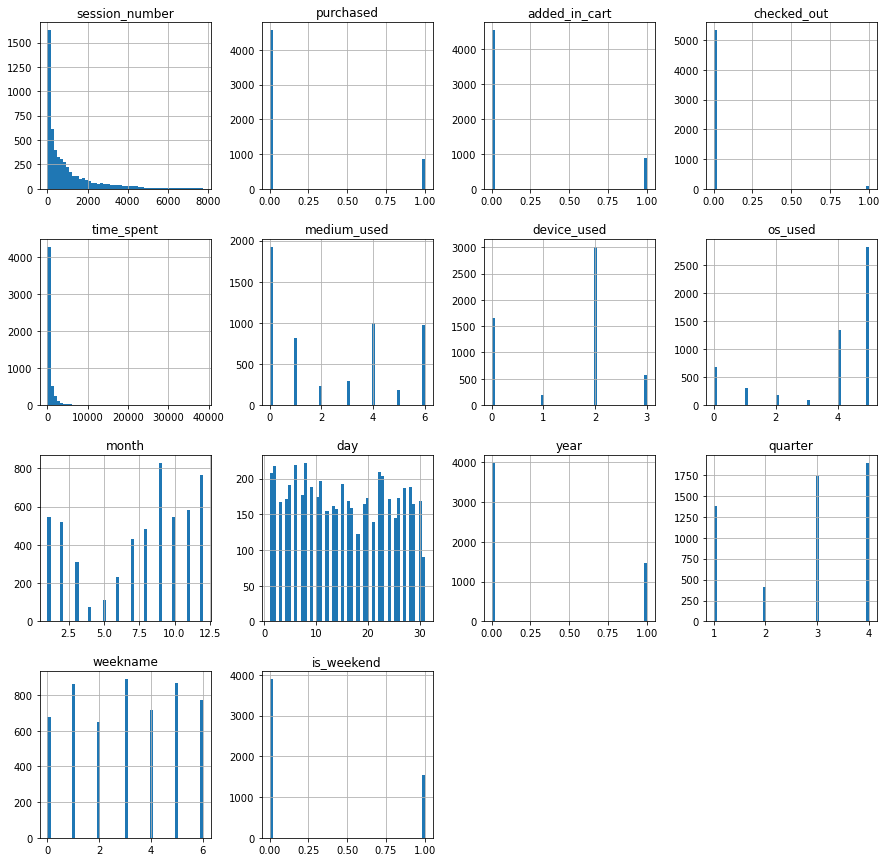

In [92]:
train_data.hist(bins=50,figsize=(15,15))

In [ ]:
X=train_data.drop(['time_spent','date','quarter','month'],axis=1)
y=train_data['time_spent']
y=y.to_frame()

In [99]:
X.head()

,session_number,purchased,added_in_cart,checked_out,medium_used,device_used,os_used,day,year,weekname,is_weekend
0,715,1,0,0,1,0,4,22,1,6,0
1,55,1,0,0,0,2,5,27,1,4,0
2,11,0,0,0,4,2,5,1,0,4,0
3,2794,0,1,0,3,0,4,30,0,1,0
4,3674,0,0,0,6,2,5,10,0,5,0


In [100]:
X.values

array([[ 715,    1,    0, ...,    1,    6,    0],
       [  55,    1,    0, ...,    1,    4,    0],
       [  11,    0,    0, ...,    0,    4,    0],
       ...,
       [ 198,    0,    0, ...,    0,    5,    0],
       [ 913,    0,    0, ...,    0,    5,    0],
       [1254,    0,    0, ...,    0,    1,    0]], dtype=int64)

In [102]:
#VIF to check for multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF data Frame
vif_data = pd.DataFrame()
vif_data['feature']=X.columns

# VIF for each feature
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

           feature       VIF
0   session_number  1.732430
1        purchased  1.260914
2    added_in_cart  1.242961
3      checked_out  1.100704
4      medium_used  1.866423
5      device_used  2.890411
6          os_used  4.236954
7              day  3.251934
8             year  1.330835
9         weekname  2.848663
10      is_weekend  1.371035


# SVM

In [103]:
Y_to_check = train_data['time_spent']

In [105]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)
to_test = test_data.drop(['quarter','month'],axis=1)
to_test = sc_X.fit_transform(to_test)

In [107]:
from sklearn.svm import  SVR
regressor = SVR(kernel='rbf',gamma=1e-8,epsilon=0.0101,tol=0.120)
regressor.fit(X,y)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(epsilon=0.0101, gamma=1e-08, tol=0.12)

In [109]:
submission = regressor.predict(to_test)
submission = sc_y.inverse_transform(submission)

In [110]:
submission=pd.DataFrame(data=submission,columns=['time_spent'])

In [111]:
submission.to_csv('submission.csv',index=False)